In [1]:


%%html
<link rel="stylesheet" href="custom.css"> 


<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>



\title{Algorithme de Métropolis Hasting Pseudo Marginal : Théorie et implémentation}
\author{Enzo Cabaret, Romain Rossello}
\maketitle














\section{Introduction}

Dans le cadre de notre projet de fin d'étude nous présentons ici en détail l'algorithme de Métropolis Hasting et son implémentation en python. (à compléter)

\section{ I Introduction aux chaines de Markov}

L'algorithme de Métropolis Hasting fait partie des méthodes dites "Markov Chains Monte Carlo" (MCMC), ces méthodes permettent de simuler des lois de probabilité dont on ne connaitrait pas l'intégralité des paramètres. Ces méthodes ont deux aspects, Monte Carlo : il s'agit d'estimer une quantité à partir de tirage aléatoires, Markov Chains: on va chercher à simuler les réalisations d'une chaine de Markov dont la loi limite est notre loi cible. Dans cette première section on donne les éléments de base pour comprendre les aspects des chaines de markovs utiles pour apréhender les MCMC.


On se place dans un espace mesurable $(\mathrm{X},\mathcal{X})$
\begin{definition}
On dit que $P:\mathrm{X}\times\X \to \R^+$ est un kernel de Markov si $\forall (x,A)\in \mathrm{X},\X$ on a:

\begin{itemize}
\item $\mathrm{X}\ni y \mapsto P(y,A)$ est $\B(\R^+)$ mesurable
\item $\X \ni B \mapsto P(x,B)$ est une mesure de probabilité sur $(\mathrm{X},\mathcal{X})$
\end{itemize}
\end{definition}

\begin{definition}
Soit $(X_k)_{k\in \N}$ une séquence de variables aléatoires sur un même espace $(\Omega,\G,\P)$ et prenant des valeurs dans $\mathrm{X}$ on dit que $(X_k)_{k\in \N}$ est une chaine de markov si et seulement si on a:

\begin{itemize}
\item $\forall (k,A) \in \N \times\X$ on a $ \P(X_{k+1}\in A|X_{0:k})= P(X_k,A)$ $\P$-ps
\item $\P(X_0 \in A) = \nu(A)$  avec $\nu \in M_1(\X)$
\end{itemize}
\end{definition}

\subsection{Notations additionnelles}

On introduit ici des notations en lien avec les kernels de markovs pour simplifer l'expression des calculs par la suite.

Soit $\mu \in M_1(\X)$, $P,Q$ des kernel de markov  et $h$ une fontion bornée sur $\mathrm{X}$ on note :
\begin{itemize}
\item $\mu P$: $\X \ni A \mapsto \mu P(A) = \int \mu(dx)P(x,A)$
\item $PQ$ le kernel de markov: $(x,A)\mapsto \int_\mathrm{X} P(x,dy)Q(y,A)$
\end{itemize}

\begin{lemma} $(X_k)_{k\in \N}$ une chaine de markov sur $(\Omega,\G,\P)$ et qui prend des valeurs dans $\mathrm{X}$ avec un kernel $P$ et une distribution initiale $\nu$ alors $ \forall n \in \N$ la loi de $X_{0:n}$ est $\nu(dx_0)\prod_{i=1}^{n-1}P(x_i,dx_{i+1})$. De meme $X_n$ suit la loi $\nu P^n$
\end{lemma}
\begin{proof}
Facile. Pour la deuxième assertion il suffit d'integrer le résultat de la premiere.
\end{proof}

\subsection{Probabilités invariantes}

\begin{definition} 
On appelle probabilité invariante pour le kernel de Markov $P$ toute mesure $\pi$ vérifiant : $\pi = \pi P$
\end{definition}

\begin{definition} 
Soit $\pi$ une mesure de probabilité et P un kernel de markov on dit que P et $\pi$-reversible si 

\[\pi(dx)P(x,dy) = \pi(dy)P(y,dx) \]

\end{definition}

\begin{proposition}
Soit $P$ un kernel de Markov et $\pi$ une probabilité. Si P est $\pi$-reversible alors $\pi$ est invariante pour P.
\end{proposition}

\section{II Algorithme d'Acceptation Rejet et Métropolis Hastings}

\subsection{Rappels des simulations de variables aléatoires}

On note ici $X$ une variable aléatoire (v.a.) réele et $F$ sa fonction de répartition : $F(x) := \P(X\leq x)$

On rappelle que $F$ est croissante, continue à droite et limité à gauche.

\begin{definition}
On appelle inverse généralisée de F ou fontion quantile la fonction définie par : \[ \forall u \in ]0,1[\enspace 
F^{-1}(u) = \mathrm{inf}\{x\in\R\mid F(x)\geq u\}\]
\end{definition}

\begin{theorem}
Soient $X$ une v.a. réele et $U$ une v.a. de loi uniforme sur $]0,1[$. Alors $F^{-1}(U)$ et $X$ ont la même loi.
\end{theorem}
\begin{proof}
(si on a le temps de l'écrire)
\end{proof}
\subsection{Algorithme d'acceptation rejet}
a completer ...


\subsection{Algorithme de Métropolis Hasting}

Dans les méthodes MCMC nous allons chercher à simuler les réalisations d'une chaine de Markov de kernel $P$ acceptant pour probabilité invariante la loi que l'on cherche à simuler $\pi$. Toute la problématique revient à trouver le kernel $P$ adéquat. L'approche de Métropolis Hasting nous permet de construire ce kernel.

Comme dans la méthode d'acceptation rejet on suppose que l'on dispose d'une densité nous permettant de générer des candidats pour l'état suivant de notre chaine de markov $y$ à l'état courant $x$ que l'on note $q(x,y)$. Si $q$ vérifie la condition de réversibilité (inserer ref) notre objectif est déja atteint. Cependant il n'y a pas de raison que ce soit le cas. Supposons $x,y \in X$ tels que :

\[\pi(x)q(x,y)>\pi(y)q(y,x)\]

Dans ce cas la notre chaine de Markov bouge de x vers y trop souvent on introduit donc une probabilité $\alpha(x,y)<1$ pour que y soit pris comme état suivant moins fréquement. Cela revient à choisir comme kernel de Markov le kernel de densité. 

\[p_{MH}(x,y) = q(x,y)\alpha(x,y)\text{  avec } x\neq y \]

On souhaite donc introduire $\alpha(x,y)$ et $\alpha(y,x)$ tels que l'équation d'equilibre (inserer ref) soit vérifiée cad :

\[\pi(x)q(x,y)\alpha(x,y)=\pi(y)q(y,x)\alpha(y,x)\]

ce qui nous donne l'identité suivante pour définir $\alpha$:

\[\alpha(x,y) = \frac{\pi(y)q(y,x)}{\pi{x}q{x,y}}\alpha(y,x)\]

Dans l'algorithme de métropolis hasting on cherche à ce que $\alpha(x,y)$ soit maximale pour une exploration des nouveaux états plus rapides ce qui revient donc à :

\[\alpha(x,y) = \mathrm{min}(\frac{\pi(y)q(y,x)}{\pi{x}q{x,y}},1)\]

Pour finir la définition du Kernel de Métropolis Hasting on doit considérer le cas ou notre chaine de Markov reste dans le même état car actuellement on se plaçait dans le cas $x\neq y$. En utilisant notre raisonnement précédent la probabilité que la chaine reste dans le même état est :

\[r(x) = 1 - \int_\mathrm{X}q(x,y)\alpha(x,y)dy\]

Finallement on définit le kernel de Métropolis Hasting par :

\[P_{MH}(x,y) = q(x,y)\alpha(x,y)dy + \left[1 - \int_\mathrm{X}q(x,y)\alpha(x,y)dy\right]\delta_x(dy)\]


Ce qui nous amène à l'implémentation de l'algorithme de Métropolis Hasting :


-Initialiser $x_0$ arbitrairement. <br />
-Pour $i=0,\dotsc,n-1$ faire :<br /> 
&nbsp; -Tirer $y$ à avec $q(x,\cdot)$ et $u$ avec $\mathscr{U}(0,1)$ <br />
&nbsp; -Si $u<\alpha(x_i,y)$ alors $x_{i+1} = y$<br />
&nbsp; -Sinon $x_{i+1} = x_i$<br />
-Fin Pour<br />
-Retourner $x_0,\dotsc,x_n$

Nous illustrons l'algorithme par un exemple simple : <br />
On se place dans le cas d'une distribution normale centrée réduite perturbée, le problème ici c'est que l'on ne peut pas exprimer la constante de normalisation toutefois l'algorithme de métropolis hasting nous permet quand meme de génerer des tirages.

-fonction cible : $\pi(x) \propto \mathrm{sin}^2(x) \times \mathrm{sin}^2(2x) \times \mathrm{exp}(-x^2/2)$ <br />
-kernel : $q:x \mapsto \mathscr{U}(x-\mu,x+\mu)$ avec $\mu > 0$<br />



In [2]:
import numpy as np

def pi(x):
    return (np.sin(x)**2)*(np.sin(2*x)**2)*np.exp(-(x**2)/2)

def metropolis_hastings(x_0,n,mu=1):
    X = np.empty(n)
    X[0] = x_0
    for i in range(n-1):
        y = np.random.uniform(X[i]-mu,X[i]+mu)
        u = np.random.uniform(0,1)
        if u < min(pi(y)/pi(X[i]),1):
            X[i+1] = y
        else:
            X[i+1] = X[i]
    return X
    

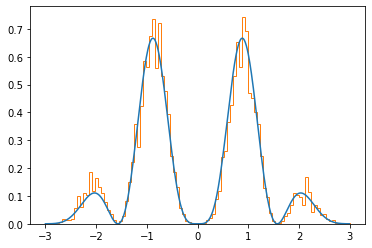

In [3]:
import matplotlib.pyplot as plt 

#paramètres
x_0 = 3
n = 10**4


x_MH = metropolis_hastings(x_0,n)

#graphe de la fonction cible :
x = np.arange(-3,3,0.01)
y = pi(x)
y = [i/(sum(y)*0.01) for i in y]
plt.plot(x,y)

#hisogramme des échantillons obtenus par MH
n,bins,patches = plt.hist(x_MH,100,density = True,histtype = 'step')


plt.show()


$\def\egalpardef{\mathop{=}\limits^\triangle}
\def\xb{\mathbf{x}}
\def\X{\mathcal{X}}
\def\B{\mathcal{B}}
\def\G{\mathcal{G}}
\def\mystar{{*}}
\def\deriv#1#2{\frac{\mathrm{d}#1}{\mathrm{d}#2}}
\def\Lambdab{\mathbf{\Lambda}}
\def\Ab{\mathbf{A}}
\def\sinc#1{\mathrm{sinc\left(#1\right)}}
\newcommand{\C}{\mathbb{C}}
\newcommand{\P}{\mathbb{P}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Z}{\mathbb{Z}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\D}{\mathscr{D}}
\newcommand{\F}{\mathscr{F}}
$